In [17]:
%matplotlib inline

import sys, os
sys.path.append(os.path.abspath(os.path.join('..', 'src/')))
from sgpi.util import get_dataset, get_xy, get_r_squared, split, to_data_matrix

from sgpi import model
from sgpi.learner import SGRegressionLearner
import sqlalchemy as sa
from sqlalchemy import orm, func

from sgpi.plot import *

import pandas as pd

In [103]:
def get_results(session, id, base):
    
    results = session.query(model.Result).\
        join(model.RegularizationConfig).\
        join(model.Experiment).\
        filter(model.Experiment.experiment_id == id).\
        filter(model.RegularizationConfig.exponent_base == base).\
        order_by(model.RegularizationConfig.lambda_reg)    
    return results

def plot_grid_for_id(id):
    ses = model.make_session()

    results1 = get_results(ses, id, 1)
    results4 = get_results(ses, id, 4)

    lambda_1 = [res.regularization_config.lambda_reg for res in results1]
    mse_1 = [np.sqrt(res.validation_mse) for res in results1]

    lambda_4 = [res.regularization_config.lambda_reg for res in results4]
    mse_4 = [np.sqrt(res.validation_mse) for res in results4]    

    fig, ax = plt.subplots()
    ax.semilogx(lambda_4, mse_4, c='red', label="Diagonal")
    ax.semilogx(lambda_1, mse_1, c='grey', label="Identity")
    ax.axhline(min(mse_1), c='black', linestyle='dashed', zorder=-1)
    ax.set_xlim(right=10e-2)
    ax.set_xlabel("Lambda")
    ax.set_ylabel("CV-RMSE")
    ax.legend()
    sns.despine(fig)
    return fig, ax

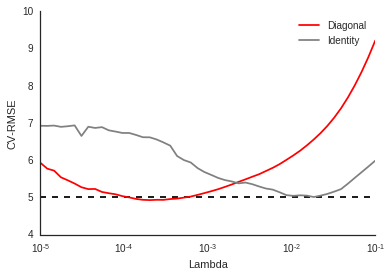

In [104]:
fig, ax = plot_grid_for_id(63) #l4, t=0
fig.savefig("../writing/thesis/figures/tikhonov_l4.pdf", bbox='tight')

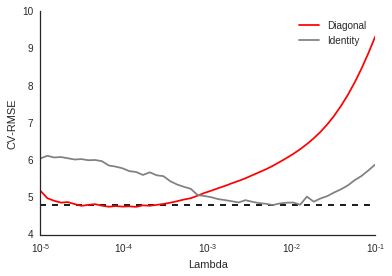

In [105]:
fig, ax = plot_grid_for_id(64) #l5, t=0.5

In [15]:
import pysgpp as sg

In [16]:
sg.RegularizationType_Identity

0